## Data Mining

### The dataset used in this assignment is available at https://www.kaggle.com/garystafford/environmental-sensor-data-132k

### References¶

https://www.kaggle.com/heeraldedhia/kmeans-clustering-for-customer-data

https://www.kaggle.com/duyguay12/regression-examples-for-machine-learning


In [133]:
# Importing necessary libraries

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier 
import numpy as np
from sklearn.naive_bayes import GaussianNB

#Customizing figure features

plt.style.use('seaborn-paper')
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
plt.rcParams.update(plt.rcParamsDefault) 

In [2]:
#Setting the filepath and importing the dataset

os.chdir("/Users/ratulnandy/Documents/MSAAI/IoT&DataAnalytics/Module5")
df = pd.read_csv('iot_telemetry_data.csv')

### Data Preprocessing

In [3]:
# Visulaizing the top 20 records

df.head(20)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
5,1.594512e+09,1c:bf:ce:15:ec:4d,0.004391,77.900002,True,0.007009,False,0.018589,27.000000
6,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
7,1.594512e+09,00:0f:00:70:91:0a,0.002938,76.000000,False,0.005241,False,0.013628,19.700001
8,1.594512e+09,1c:bf:ce:15:ec:4d,0.004345,77.900002,True,0.006957,False,0.018440,27.000000
9,1.594512e+09,b8:27:eb:bf:9d:51,0.004970,50.900000,False,0.007667,False,0.020457,22.600000


In [4]:
# Visualizing the shape of the dataset

df.shape

(405184, 9)

In [5]:
# Checking the number of unique devices 

df['device'].unique()

array(['b8:27:eb:bf:9d:51', '00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d'],
      dtype=object)

In [6]:
# Changing the device name to meaningful names (as device number). Going forward we'll use the column 
# devicenumber to track the device

df['devicenumber'] = df['device'] 
df.devicenumber.replace(['00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d', 'b8:27:eb:bf:9d:51'], [1, 2, 3], inplace=True)

In [7]:
df.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp,devicenumber
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,3
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,1
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,3
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,2
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,3


In [8]:
## Label Encoding the Boolean variables

le_light = LabelEncoder()
le_motion = LabelEncoder()

In [9]:
df['light_n'] = le_light.fit_transform(df['light'])
df['motion_n'] = le_motion.fit_transform(df['motion'])

In [10]:
df.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp,devicenumber,light_n,motion_n
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,3,0,0
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,1,0,0
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,3,0,0
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,2,1,0
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,3,0,0


In [11]:
# Droping the columns 'ts', 'device', 'light', 'motion'

df_final = df.drop(['ts','device','light','motion'], axis = 'columns')


In [12]:
df_final.head(5)

,co,humidity,lpg,smoke,temp,devicenumber,light_n,motion_n
0,0.004956,51.000000,0.007651,0.020411,22.700000,3,0,0
1,0.002840,76.000000,0.005114,0.013275,19.700001,1,0,0
2,0.004976,50.900000,0.007673,0.020475,22.600000,3,0,0
3,0.004403,76.800003,0.007023,0.018628,27.000000,2,1,0
4,0.004967,50.900000,0.007664,0.020448,22.600000,3,0,0


### Unsupervised Learning

### Performing Principal Component Analysis

Performing Principal Component Analysis using dependent variables as 'co', 'humidity', 'lpg', 'smoke', 'temp', 'light_n'
'motion_n' and using target variable as 'devicenumber'

In [13]:
# Creating features dataframe and target dataframe
df_features_pca = df_final.drop(['devicenumber'], axis = 'columns')
df_target_pca = df_final[['devicenumber']]

In [14]:
df_features_pca.head(5)

,co,humidity,lpg,smoke,temp,light_n,motion_n
0,0.004956,51.000000,0.007651,0.020411,22.700000,0,0
1,0.002840,76.000000,0.005114,0.013275,19.700001,0,0
2,0.004976,50.900000,0.007673,0.020475,22.600000,0,0
3,0.004403,76.800003,0.007023,0.018628,27.000000,1,0
4,0.004967,50.900000,0.007664,0.020448,22.600000,0,0


In [15]:
df_target_pca.head(5)

,devicenumber
0,3
1,1
2,3
3,2
4,3


In [16]:
# Scaling the features

scaler = StandardScaler()
scaler.fit(df_features_pca)
scaled_data_pca = scaler.transform(df_features_pca)

In [17]:
# Performing the PCA

pca = PCA(n_components=2, random_state = 420)
pca.fit(scaled_data_pca)

PCA(n_components=2, random_state=420)

In [18]:
t_pca = pca.transform(scaled_data_pca)

In [19]:
# Compute and retreive PCA score values 

d_pca = pd.DataFrame(t_pca, columns = ['PC1','PC2'])
d_pca.head(5)

,PC1,PC2
0,0.851985,0.253038
1,-2.872722,1.171009
2,0.876014,0.279856
3,-0.846713,-2.055299
4,0.865501,0.278880


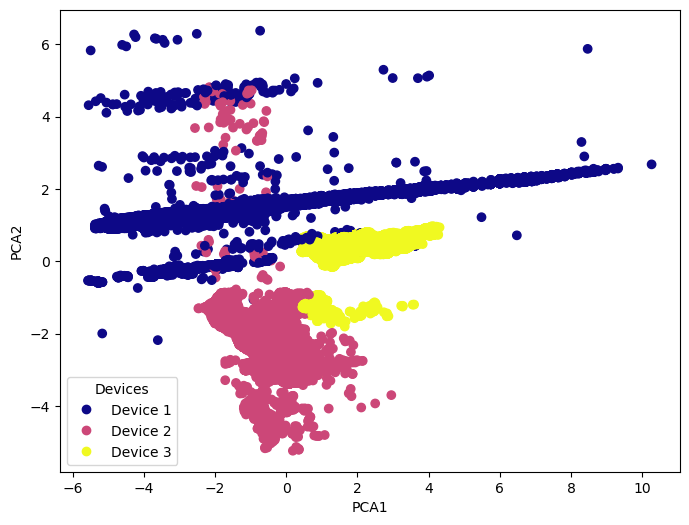

In [20]:
# Visualizing PC1 and PC2 to find pattern

dev = ['Device 1', 'Device 2', 'Device 3']
plt.figure(figsize=(8,6))
scatter = plt.scatter(t_pca[:,0],t_pca[:,1], c= df_target_pca.devicenumber.astype('category').cat.codes, cmap='plasma')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=dev,
           title="Devices")
plt.show()

### Inference - The features in the dataset was reduced using principal component analysis. The two principal component analysis is plotted against each other and it can be observed that the data data generated from each device forms clusters ( except for some outliers). We can see that the Device 1 is placed in a location where the fluctutaion of weather conditions spans widely. For Device 3, the weather condition is much stable. For Device 2, the weather conditions fluctuates randomly.

## K-Means Clustering to compare Devices

In [21]:
k_df = df_final[['devicenumber','humidity','temp']]

In [22]:
k_df

,devicenumber,humidity,temp
0,3,51.000000,22.700000
1,1,76.000000,19.700001
2,3,50.900000,22.600000
3,2,76.800003,27.000000
4,3,50.900000,22.600000
...,...,...,...
405179,1,75.300003,19.200001
405180,3,48.500000,22.200000
405181,2,75.699997,26.600000
405182,1,75.300003,19.200001


In [26]:
# Scaling the features

scaler_m = MinMaxScaler() 

scaler_m.fit(k_df[['humidity']])
k_df['humidity'] = scaler_m.transform(k_df[['humidity']])

<ipython-input-26-4540d17a882e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_df['humidity'] = scaler_m.transform(k_df[['humidity']])


In [27]:
scaler_m.fit(k_df[['temp']])
k_df['temp'] = scaler_m.transform(k_df[['temp']])

<ipython-input-27-3e8eaf7f91bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_df['temp'] = scaler_m.transform(k_df[['temp']])


In [28]:
k_df.head(10)

,devicenumber,humidity,temp
0,3,0.505061,0.741830
1,1,0.758097,0.643791
2,3,0.504049,0.738562
3,2,0.766194,0.882353
4,3,0.504049,0.738562
5,2,0.777328,0.882353
6,3,0.504049,0.738562
7,1,0.758097,0.643791
8,2,0.777328,0.882353
9,3,0.504049,0.738562


In [29]:
# K-mean clustering 

km = KMeans(n_clusters = 3)
km_y_pred = km.fit_predict(k_df[['humidity','temp']])

In [30]:
k_df[['cluster']] = km_y_pred

/Users/ratulnandy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-30-329b961368e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_df[['cluster']] = km_y_pred
/Users/ratulnandy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [31]:
k_df

,devicenumber,humidity,temp,cluster
0,3,0.505061,0.741830,1
1,1,0.758097,0.643791,0
2,3,0.504049,0.738562,1
3,2,0.766194,0.882353,2
4,3,0.504049,0.738562,1
...,...,...,...,...
405179,1,0.751012,0.627451,0
405180,3,0.479757,0.725490,1
405181,2,0.755061,0.869281,2
405182,1,0.751012,0.627451,0


#### Plotting Temperature vs Humidity based on Devices 

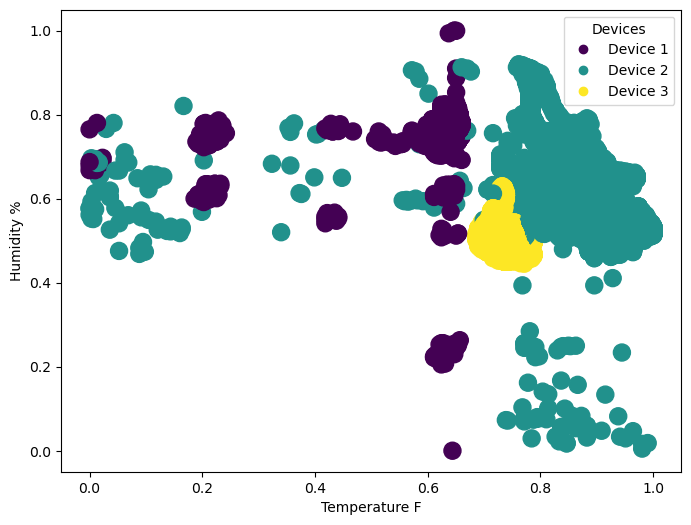

In [32]:
# Checking Temperature vs Humidy

plt.figure(figsize=(8,6))
dev = ['Device 1', 'Device 2', 'Device 3']
scatter = plt.scatter(k_df.temp, 
            k_df.humidity,
            s=150,
            c=k_df.devicenumber.astype('category').cat.codes)
plt.xlabel("Temperature F")
plt.ylabel("Humidity %")
plt.legend(handles=scatter.legend_elements()[0], 
           labels=dev,
           title="Devices")
plt.show()

#### Plotting Temperature vs Humidity based on K-Means clustering

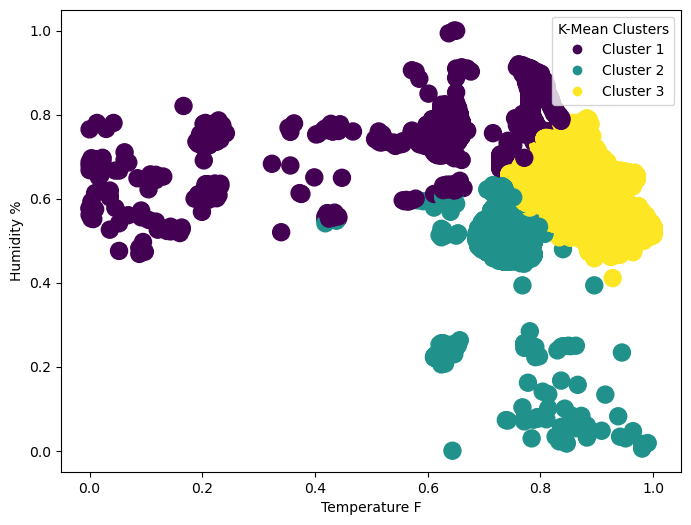

In [140]:
plt.figure(figsize=(8,6))
dev = ['Cluster 1', 'Cluster 2', 'Cluster 3']
scatter = plt.scatter(k_df.temp, 
            k_df.humidity,
            s=150,
            c=k_df.cluster.astype('category').cat.codes)
plt.xlabel("Temperature F")
plt.ylabel("Humidity %")
plt.legend(handles=scatter.legend_elements()[0], 
           labels=dev,
           title="K-Mean Clusters")
plt.show()

### Inference - Comparing the two scatter plots, it can be observed that Cluster 2 represents Device 3. Cluster 1 represnts Device 1. Cluster 3 is not a currect representation for any particular Device 

## Supervised Learning 

In [36]:
# Splitting the dataset into training data and test data

train, test = train_test_split(df_final, test_size = 0.25, random_state =420)


#### In EDA expercise, it was observed that CO, LPG and Smoke has a linear co-relation.

### Linear Regression

In [40]:
# Creating Tets Train split

df_co_lpg_smk_train = train[['co','lpg','smoke']]
df_co_lpg_smk_test = test[['co','lpg','smoke']]

### Using CO to predict LPG and Smoke

In [55]:
# Building linear regression model - Using CO to predict LPG

reg_co_lpg = linear_model.LinearRegression()
reg_co_lpg.fit(df_co_lpg_smk_train[['co']],df_co_lpg_smk_train.lpg)

LinearRegression()

In [54]:
#Evaluating the model accuracy

reg_co_lpg.score(df_co_lpg_smk_test[['co']], df_co_lpg_smk_test.lpg.values.ravel())

0.9945894794553257

In [56]:
# Building linear regression model - Using CO to predict Smoke

reg_co_smk = linear_model.LinearRegression()
reg_co_smk.fit(df_co_lpg_smk_train[['co']],df_co_lpg_smk_train.smoke)

LinearRegression()

In [57]:
#Evaluating the model accuracy

reg_co_smk.score(df_co_lpg_smk_test[['co']], df_co_lpg_smk_test.smoke.values.ravel())

0.9963334780481368

### Using LPG to predict CO and Smoke

In [58]:
# Building linear regression model - Using LPG to predict CO

reg_lpg_co = linear_model.LinearRegression()
reg_lpg_co.fit(df_co_lpg_smk_train[['lpg']],df_co_lpg_smk_train.co)

LinearRegression()

In [59]:
#Evaluating the model accuracy

reg_lpg_co.score(df_co_lpg_smk_test[['lpg']], df_co_lpg_smk_test.co.values.ravel())

0.9945895160124002

In [63]:
# Building linear regression model - Using LPG to predict Smoke

reg_lpg_smk = linear_model.LinearRegression()
reg_lpg_smk.fit(df_co_lpg_smk_train[['lpg']],df_co_lpg_smk_train.smoke)

LinearRegression()

In [64]:
#Evaluating the model accuracy

reg_lpg_smk.score(df_co_lpg_smk_test[['lpg']], df_co_lpg_smk_test.smoke.values.ravel())

0.9998294977418875

### Using Smoke to predict CO and LPG

In [65]:
# Building linear regression model - Using Smoke to predict CO

reg_smk_co = linear_model.LinearRegression()
reg_smk_co.fit(df_co_lpg_smk_train[['smoke']],df_co_lpg_smk_train.co)

LinearRegression()

In [66]:
#Evaluating the model accuracy

reg_smk_co.score(df_co_lpg_smk_test[['smoke']], df_co_lpg_smk_test.co.values.ravel())

0.9963335013043149

In [67]:
# Building linear regression model - Using Smoke to predict LPG

reg_smk_lpg = linear_model.LinearRegression()
reg_smk_lpg.fit(df_co_lpg_smk_train[['smoke']],df_co_lpg_smk_train.lpg)

LinearRegression()

In [68]:
reg_smk_lpg.score(df_co_lpg_smk_test[['smoke']], df_co_lpg_smk_test.lpg.values.ravel())

0.9998294976570087

## Machine Learning model to classify the Device number based on the CO, Temperature, Humidity.  

#### Since CO, LPG abd Smoke are highly co-related, dropping LPG and Smoke to reduce dimension

In [72]:
# Splitting the dataset into training data and test data

df_device_train = train[['co','temp','humidity','devicenumber']]
df_device_test = test[['co','temp','humidity','devicenumber']]

In [73]:
# Preparing the training dataset

df_device_train_input = df_device_train.drop(['devicenumber'], axis = 'columns')
df_device_train_target = df_device_train[['devicenumber']]

# Preparing the testing dataset

df_device_test_input = df_device_test.drop(['devicenumber'], axis = 'columns')
df_device_test_target = df_device_test[['devicenumber']]


### Random Forest

In [76]:
# Creating the Random Forest

rf_model = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 50, max_features = 3, n_estimators = 5)
rf_model.fit(df_device_train_input, df_device_train_target.values.ravel())



RandomForestClassifier(class_weight='balanced', max_depth=50, max_features=3,
                       n_estimators=5)

In [77]:
# Evaluating the model

rf_model.score(df_device_test_input, df_device_test_target.values.ravel())

0.9999210235349866

In [125]:
rf_result = rf_model.predict(df_device_test_input)

In [126]:
device_pred = df_device_test[['devicenumber']]

In [130]:
device_pred['rf_pred'] = rf_result.tolist()

<ipython-input-130-4ff79409ab8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_pred['rf_pred'] = rf_result.tolist()


In [132]:
device_pred.head(5)

,devicenumber,rf_pred
349722,2,2
76844,3,3
384101,3,3
197936,3,3
26884,3,3


### Naive Bayes

In [134]:
# Building Model for Naive Bayes Classifier

b_model = GaussianNB()
b_model.fit(df_device_train_input, df_device_train_target.values.ravel())

GaussianNB()

In [141]:
# Evaluating the model

b_model.score(df_device_test_input, df_device_test_target.values.ravel())

0.9976603222239773

In [136]:
b_result = b_model.predict(df_device_test_input)

In [137]:
device_pred['b_pred'] = b_result.tolist()

<ipython-input-137-1e135b143361>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_pred['b_pred'] = b_result.tolist()


In [138]:
device_pred

,devicenumber,rf_pred,b_pred
349722,2,2,2
76844,3,3,3
384101,3,3,3
197936,3,3,2
26884,3,3,3
...,...,...,...
252572,2,2,2
93966,2,2,2
318050,3,3,3
106084,1,1,1


### Inference - It can be observed that the Random Forest model performed better that Naive Bayes